In [1]:
import pandas as pd
import numpy as np

In [2]:
bird_strikes_data=pd.read_csv("Bird Strikes data.csv")

In [3]:
bird_strikes_data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,23-11-2000 00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,25-07-2001 00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,14-09-2001 00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,05-09-2002 00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,23-06-2003 00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [4]:
print(bird_strikes_data.isnull().sum())

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [5]:
bird_strikes_data.dtypes

Record ID                                   int64
Aircraft: Type                             object
Airport: Name                              object
Altitude bin                               object
Aircraft: Make/Model                       object
Wildlife: Number struck                    object
Wildlife: Number Struck Actual              int64
Effect: Impact to flight                   object
FlightDate                                 object
Effect: Indicated Damage                   object
Aircraft: Number of engines?               object
Aircraft: Airline/Operator                 object
Origin State                               object
When: Phase of flight                      object
Conditions: Precipitation                  object
Remains of wildlife collected?               bool
Remains of wildlife sent to Smithsonian      bool
Remarks                                    object
Wildlife: Size                             object
Conditions: Sky                            object


In [6]:
# Convert FlightDate to datetime with dayfirst=True
bird_strikes_data['FlightDate'] = pd.to_datetime(bird_strikes_data['FlightDate'], dayfirst=True, errors='coerce')

# Convert Cost: Total $ to numeric
bird_strikes_data['Cost: Total $'] = pd.to_numeric(bird_strikes_data['Cost: Total $'].str.replace(',', ''), errors='coerce')

# Convert Feet above ground to numeric
bird_strikes_data['Feet above ground'] = pd.to_numeric(bird_strikes_data['Feet above ground'], errors='coerce')

# Convert Aircraft: Number of engines? to numeric
bird_strikes_data['Aircraft: Number of engines?'] = pd.to_numeric(bird_strikes_data['Aircraft: Number of engines?'], errors='coerce')

# Check the data types again
print(bird_strikes_data.dtypes)

Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Number of engines?                      float64
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Remarks       

In [7]:
# Drop columns with more than 50% missing values
threshold = len(bird_strikes_data) * 0.5
bird_strikes_data.dropna(thresh=threshold, axis=1, inplace=True)

# Fill missing values with specific values
bird_strikes_data = bird_strikes_data.assign(
    **{
        'Aircraft: Type': bird_strikes_data['Aircraft: Type'].fillna('Unknown'),
        'Airport: Name': bird_strikes_data['Airport: Name'].fillna('Unknown'),
        'Altitude bin': bird_strikes_data['Altitude bin'].fillna('Unknown'),
        'Wildlife: Number struck': bird_strikes_data['Wildlife: Number struck'].fillna('Unknown'),
        'FlightDate': bird_strikes_data['FlightDate'].fillna('Unknown'),
        'Aircraft: Airline/Operator': bird_strikes_data['Aircraft: Airline/Operator'].fillna('Unknown'),
        'When: Phase of flight': bird_strikes_data['When: Phase of flight'].fillna('Unknown'),
        'Origin State': bird_strikes_data['Origin State'].fillna('Unknown'),
        'Pilot warned of birds or wildlife?': bird_strikes_data['Pilot warned of birds or wildlife?'].fillna('Unknown'),
        'Feet above ground': bird_strikes_data['Feet above ground'].fillna(0),
        'Is Aircraft Large?': bird_strikes_data['Is Aircraft Large?'].fillna('Unknown'),
        'Aircraft: Number of engines?': bird_strikes_data['Aircraft: Number of engines?'].fillna(bird_strikes_data['Aircraft: Number of engines?'].mean())
    }
)

# Forward fill for remaining missing values
bird_strikes_data.ffill(inplace=True)

print(bird_strikes_data.isnull().sum())

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of 

datetime64[ns]


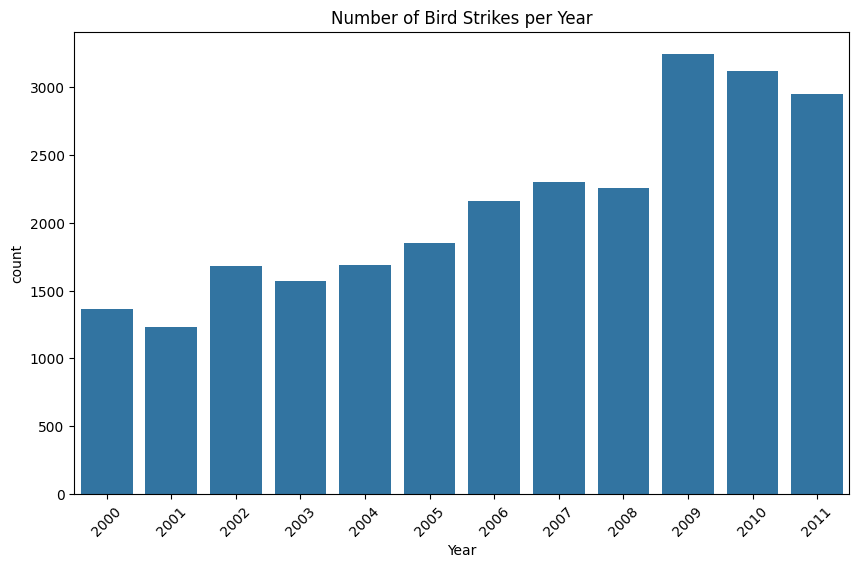

In [8]:
# Convert FlightDate to datetime with dayfirst=True
bird_strikes_data['FlightDate'] = pd.to_datetime(bird_strikes_data['FlightDate'], dayfirst=True, errors='coerce')

# Drop rows with invalid FlightDate values
bird_strikes_data.dropna(subset=['FlightDate'], inplace=True)

# Verify the data type of FlightDate
print(bird_strikes_data['FlightDate'].dtype)

# Now you can safely use the .dt accessor
bird_strikes_data['Year'] = bird_strikes_data['FlightDate'].dt.year

# Plot the distribution of bird strikes over the years
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Year')
plt.title('Number of Bird Strikes per Year')
plt.xticks(rotation=45)
plt.show()

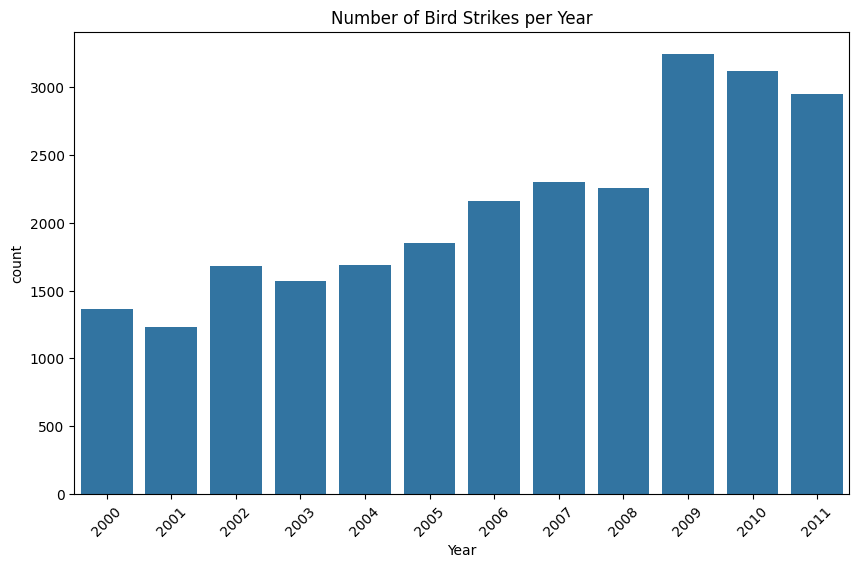

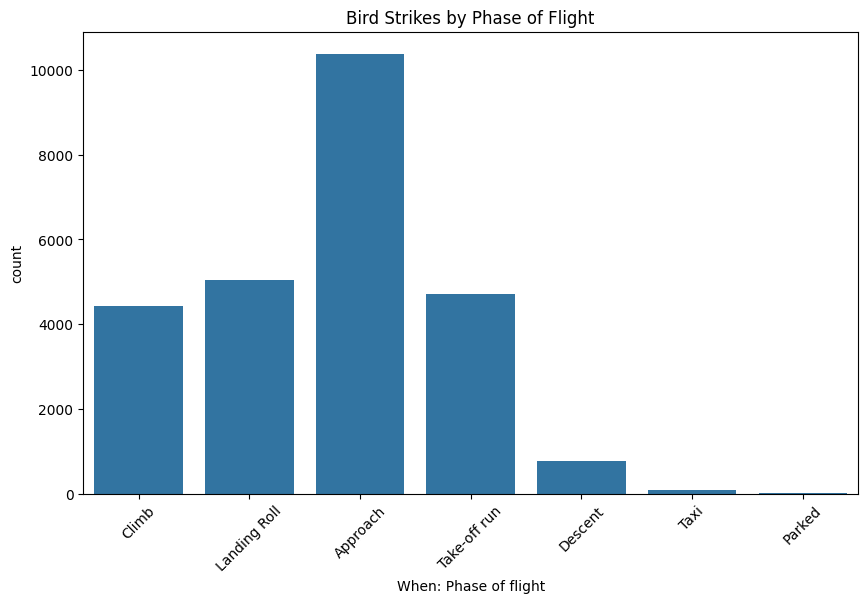

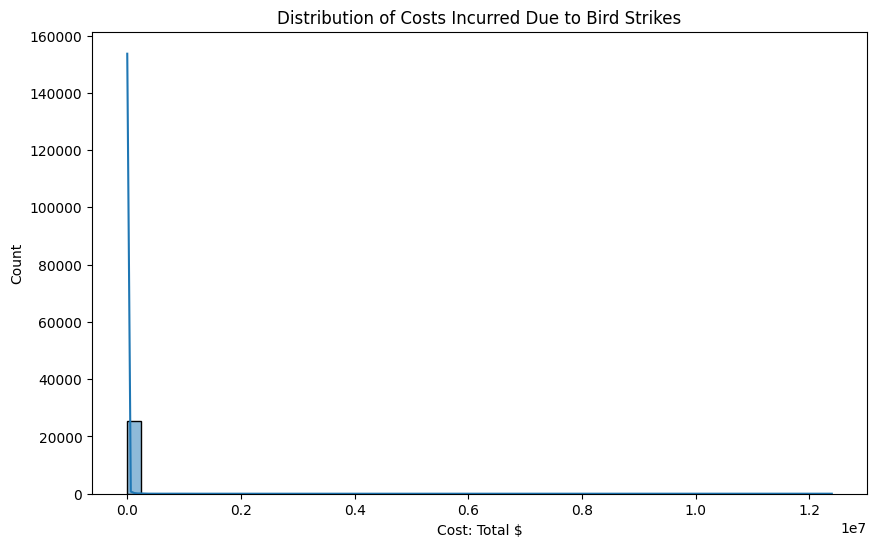

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of bird strikes over the years
bird_strikes_data['Year'] = bird_strikes_data['FlightDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Year')
plt.title('Number of Bird Strikes per Year')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of bird strikes by phase of flight
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='When: Phase of flight')
plt.title('Bird Strikes by Phase of Flight')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of costs incurred due to bird strikes
plt.figure(figsize=(10, 6))
sns.histplot(bird_strikes_data['Cost: Total $'], bins=50, kde=True)
plt.title('Distribution of Costs Incurred Due to Bird Strikes')
plt.show()


In [10]:
# Summary statistics
print(bird_strikes_data.describe(include='all'))


            Record ID Aircraft: Type                Airport: Name  \
count    25429.000000          25429                        25429   
unique            NaN              1                         1109   
top               NaN       Airplane  DALLAS/FORT WORTH INTL ARPT   
freq              NaN          25429                          803   
mean    253800.148767            NaN                          NaN   
min       1195.000000            NaN                          NaN   
25%     225742.000000            NaN                          NaN   
50%     248609.000000            NaN                          NaN   
75%     269044.000000            NaN                          NaN   
max     321909.000000            NaN                          NaN   
std      38472.800499            NaN                          NaN   

       Altitude bin Aircraft: Make/Model Wildlife: Number struck  \
count         25429                25429                   25429   
unique            2                

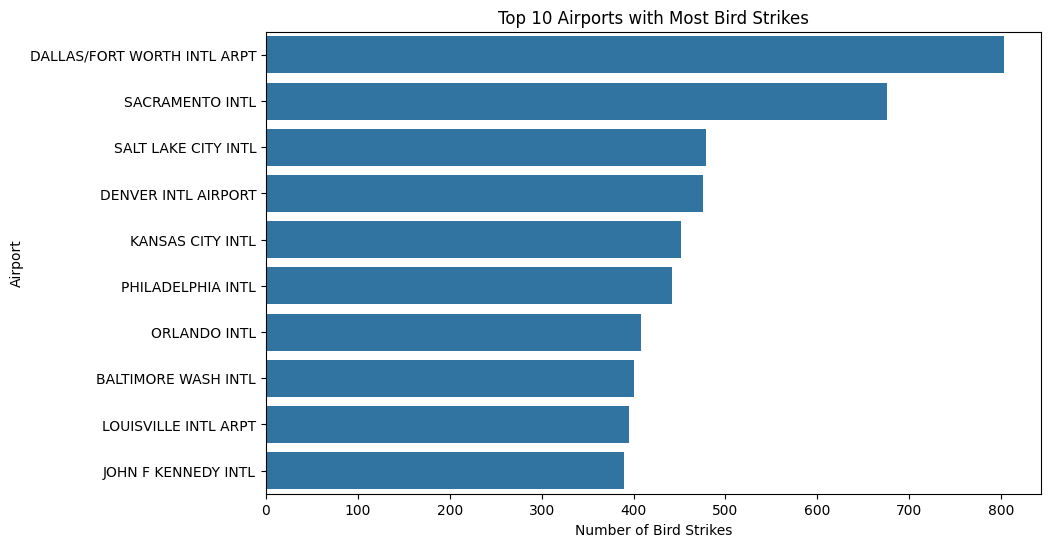

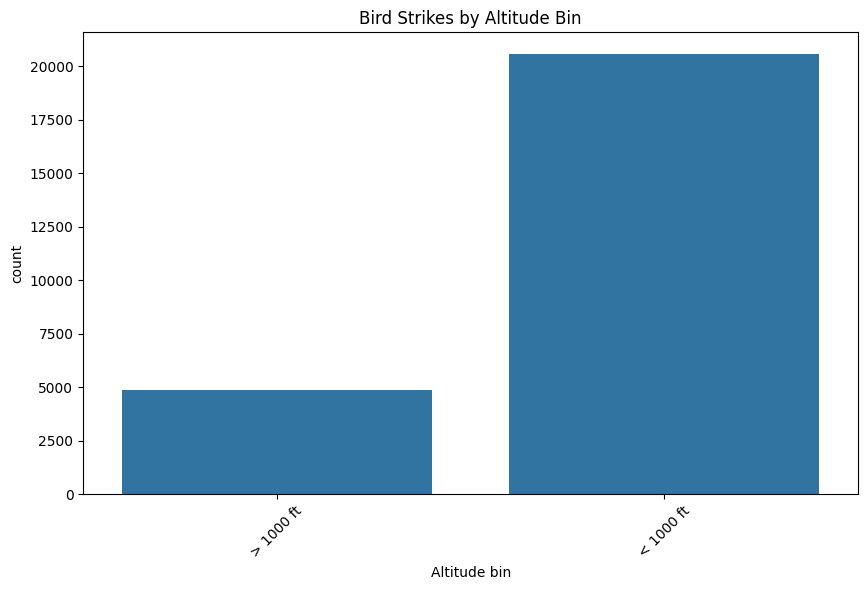

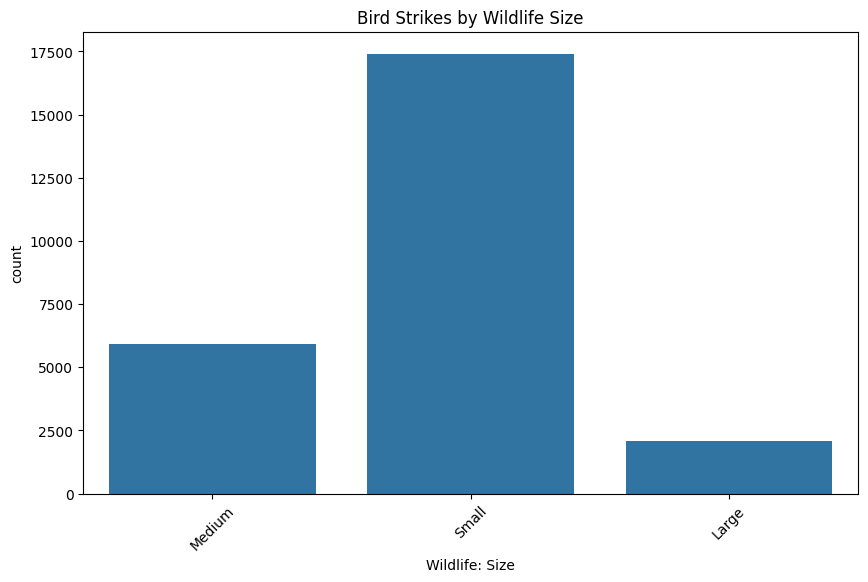

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Bird Strikes by Airport
plt.figure(figsize=(10, 6))
top_airports = bird_strikes_data['Airport: Name'].value_counts().head(10)
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title('Top 10 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()

# Distribution of Bird Strikes by Altitude Bin
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Altitude bin')
plt.title('Bird Strikes by Altitude Bin')
plt.xticks(rotation=45)
plt.show()

# Distribution of Bird Strikes by Wildlife Size
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Wildlife: Size')
plt.title('Bird Strikes by Wildlife Size')
plt.xticks(rotation=45)
plt.show()


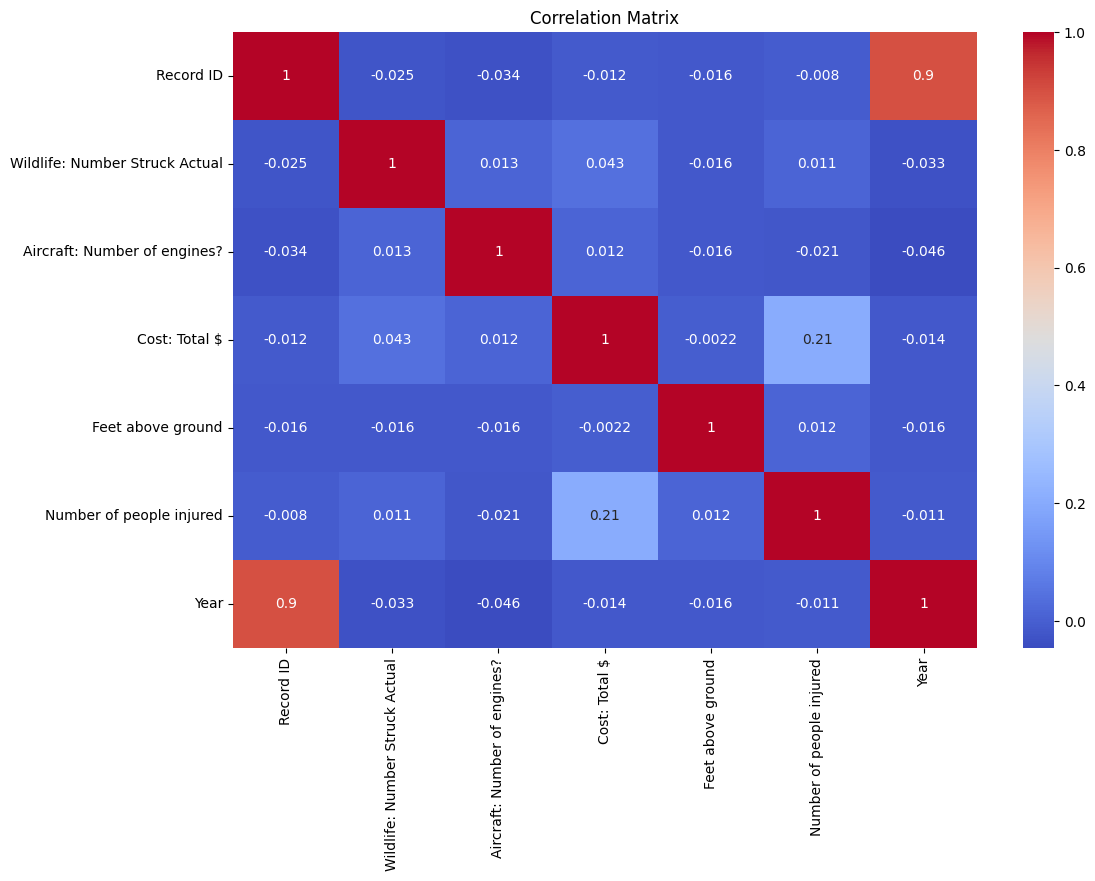

In [12]:
# Select only numeric columns
numeric_columns = bird_strikes_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. Visuals Depicting the Number of Bird Strikes

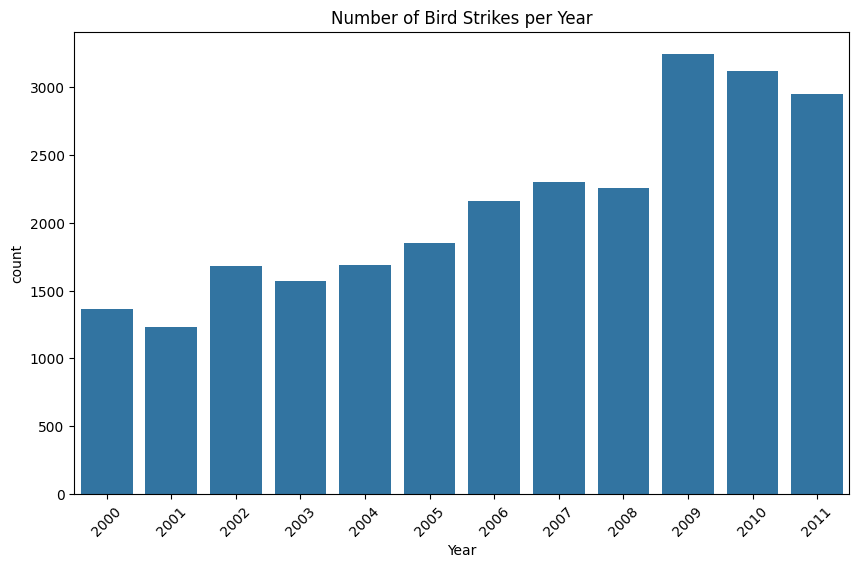

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of bird strikes over the years
bird_strikes_data['Year'] = bird_strikes_data['FlightDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Year')
plt.title('Number of Bird Strikes per Year')
plt.xticks(rotation=45)
plt.show()


2. Yearly Analysis & Bird Strikes in the US

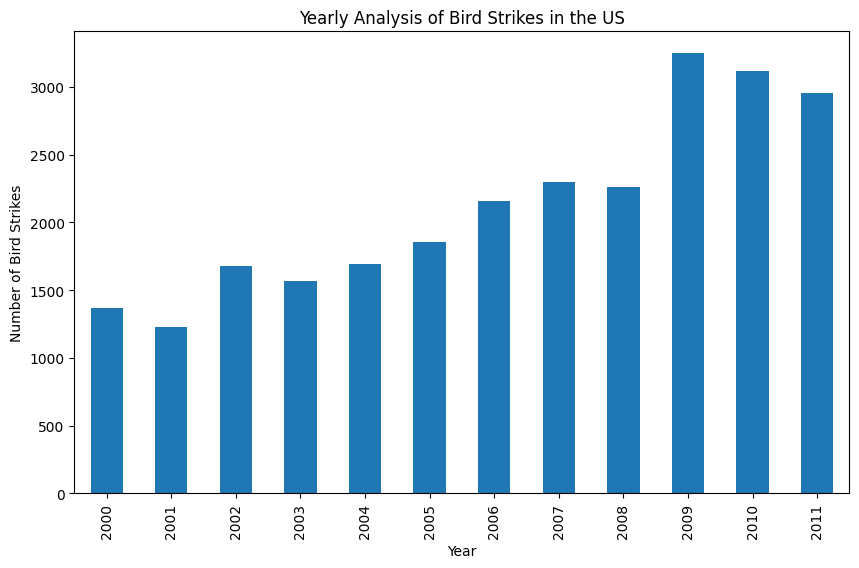

In [14]:
# Yearly analysis of bird strikes
yearly_strikes = bird_strikes_data.groupby('Year').size()
plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='bar')
plt.title('Yearly Analysis of Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()


3. Top 10 US Airlines in Terms of Bird Strikes

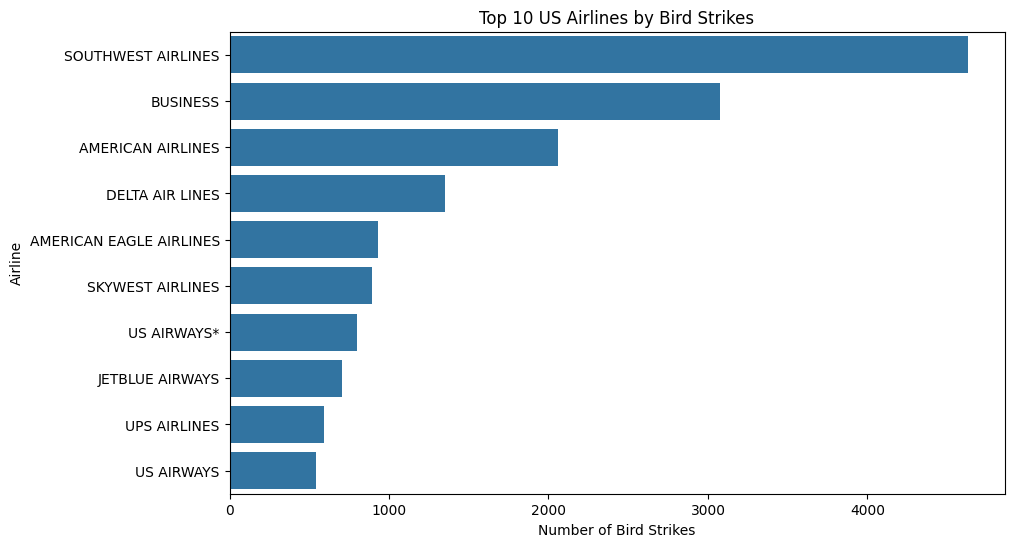

In [15]:
# Top 10 US Airlines by bird strikes
top_airlines = bird_strikes_data['Aircraft: Airline/Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index)
plt.title('Top 10 US Airlines by Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.show()


Airports with Most Incidents of Bird Strikes – Top 50

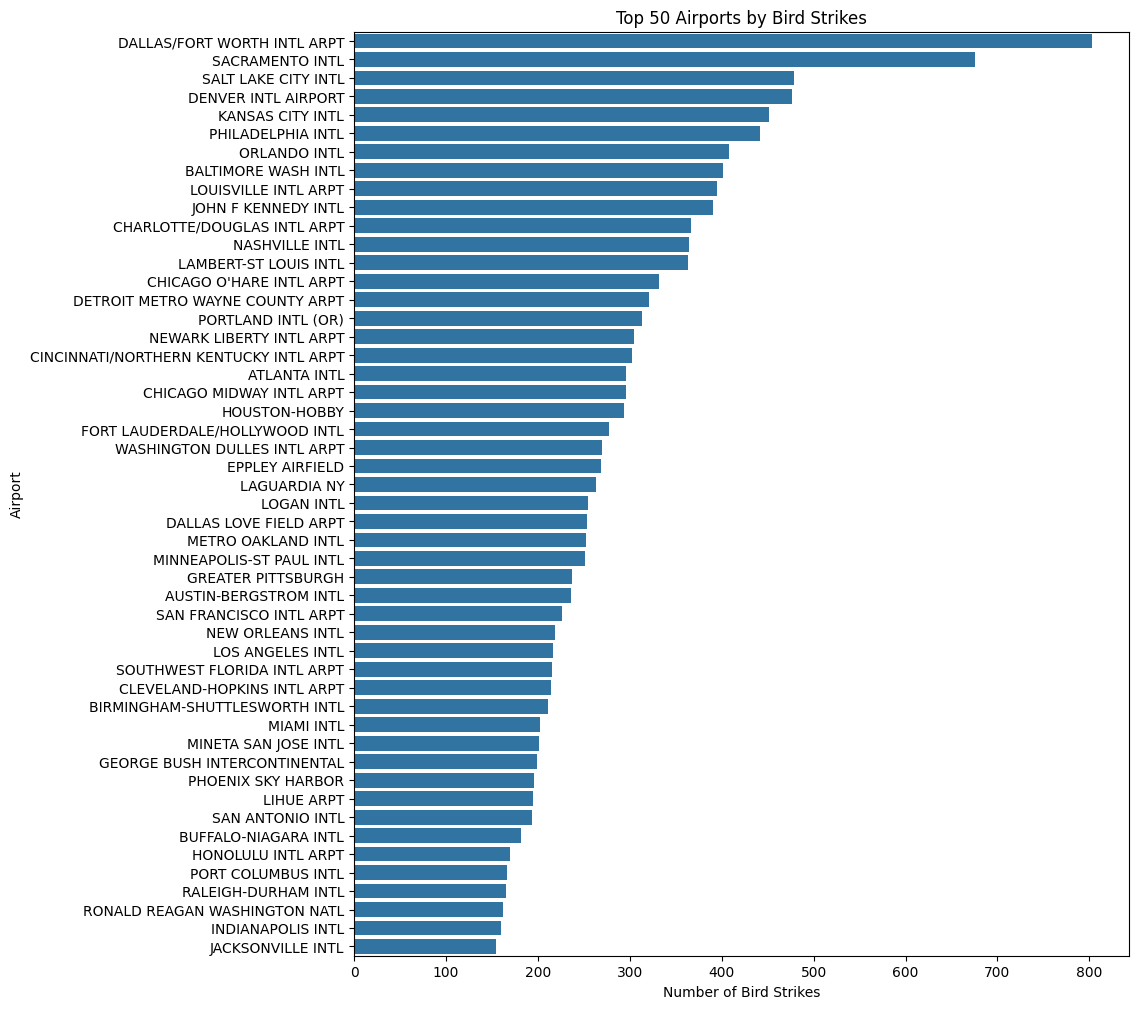

In [16]:
# Top 50 airports by bird strikes
top_airports = bird_strikes_data['Airport: Name'].value_counts().head(50)
plt.figure(figsize=(10, 12))
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title('Top 50 Airports by Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()


5. Yearly Cost Incurred due to Bird Strikes

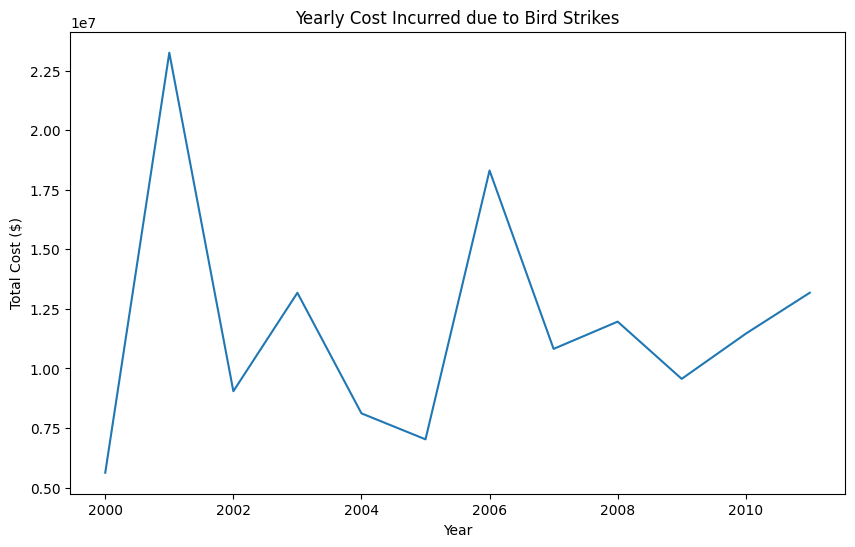

In [17]:
# Yearly cost incurred due to bird strikes
yearly_cost = bird_strikes_data.groupby('Year')['Cost: Total $'].sum()
plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='line')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()


6. When Do Most Bird Strikes Occur?

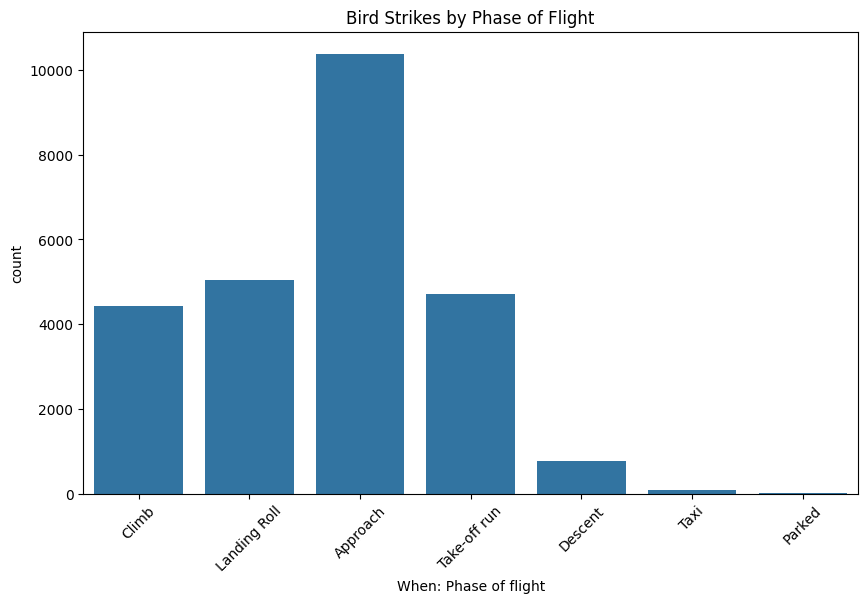

In [18]:
# Bird strikes by phase of flight
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='When: Phase of flight')
plt.title('Bird Strikes by Phase of Flight')
plt.xticks(rotation=45)
plt.show()


7. Altitude of Aeroplanes at the Time of Strike

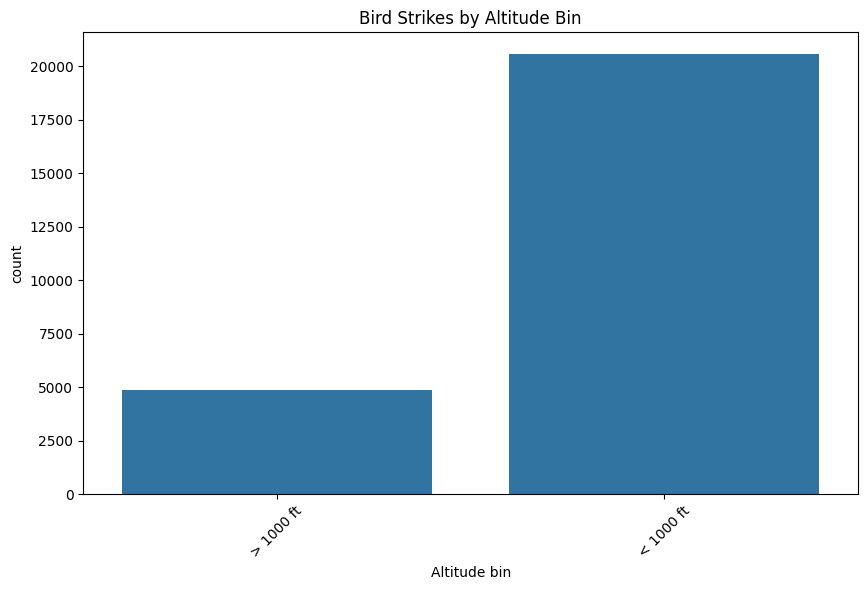

In [19]:
# Bird strikes by altitude bin
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Altitude bin')
plt.title('Bird Strikes by Altitude Bin')
plt.xticks(rotation=45)
plt.show()


8. Phase of Flight at the Time of the Strike

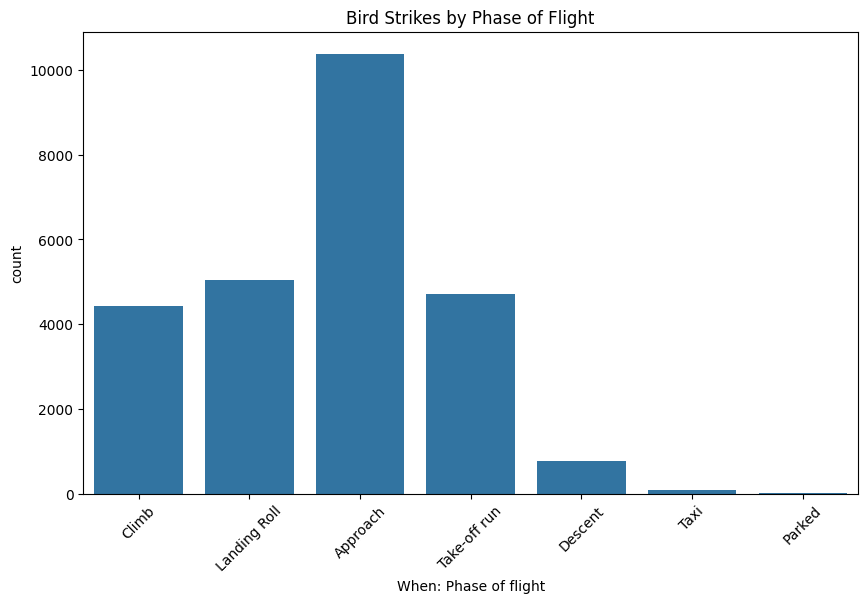

In [20]:
# Bird strikes by phase of flight
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='When: Phase of flight')
plt.title('Bird Strikes by Phase of Flight')
plt.xticks(rotation=45)
plt.show()


9. Average Altitude of the Aeroplanes in Different Phases at the Time of Strike

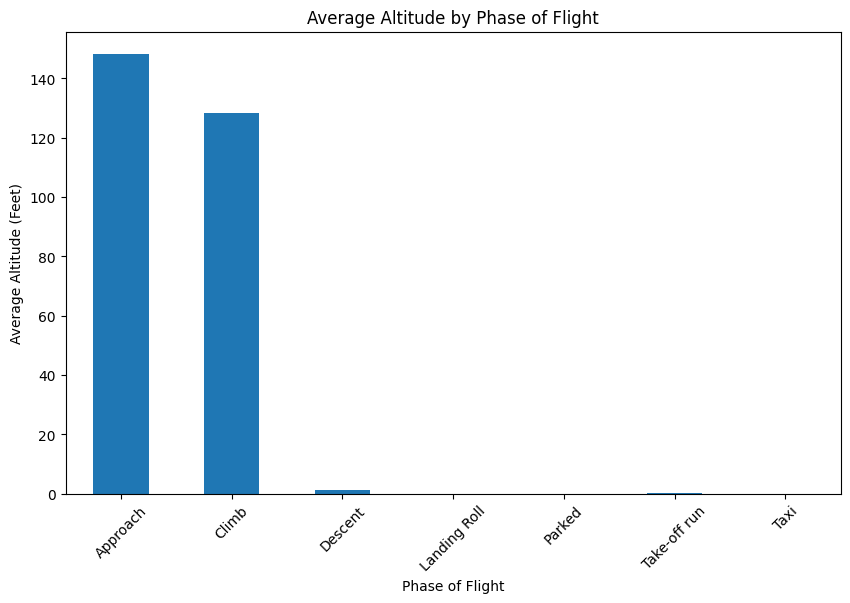

In [21]:
# Average altitude by phase of flight
avg_altitude = bird_strikes_data.groupby('When: Phase of flight')['Feet above ground'].mean()
plt.figure(figsize=(10, 6))
avg_altitude.plot(kind='bar')
plt.title('Average Altitude by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet)')
plt.xticks(rotation=45)
plt.show()


10. Effect of Bird Strikes & Impact on Flight

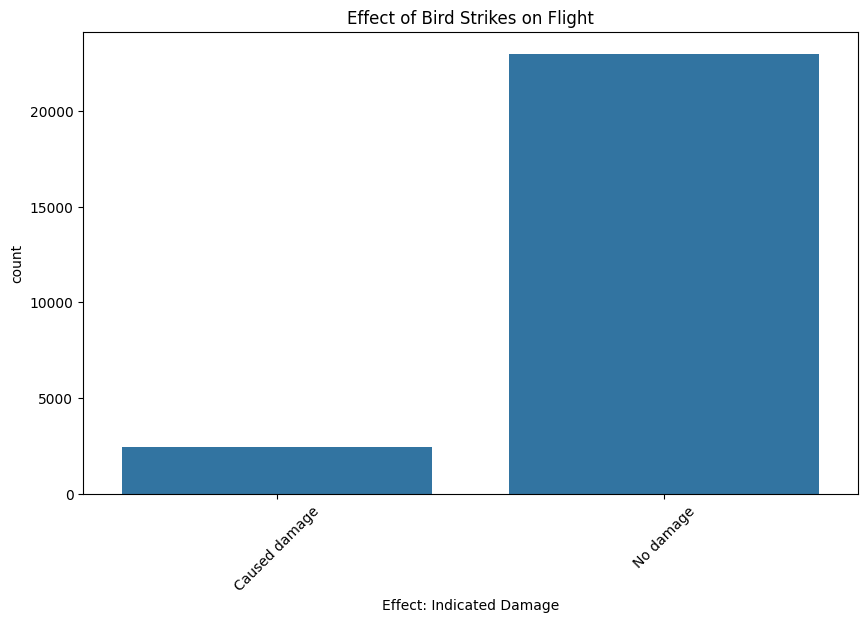

In [22]:
# Check column names
#print(bird_strikes_data.columns)

# If the column name is different, update it accordingly
# For example, if the correct column name is 'Effect: Indicated Damage'
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Effect: Indicated Damage')
plt.title('Effect of Bird Strikes on Flight')
plt.xticks(rotation=45)
plt.show()


11. Effect of Strike at Different Altitudes

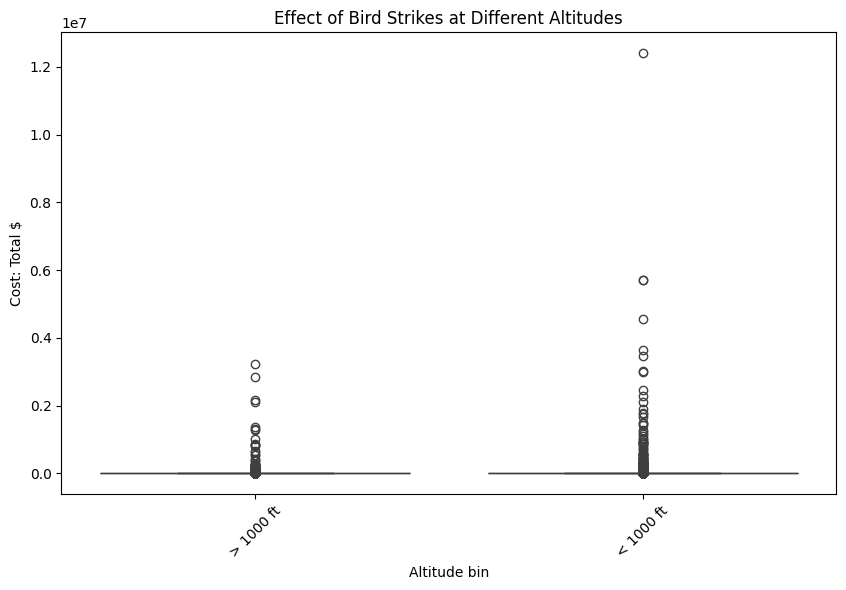

In [23]:
# Effect of bird strikes at different altitudes
plt.figure(figsize=(10, 6))
sns.boxplot(data=bird_strikes_data, x='Altitude bin', y='Cost: Total $')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xticks(rotation=45)
plt.show()


12.Were Pilots Informed? & Prior Warning and Effect of Strike Relation

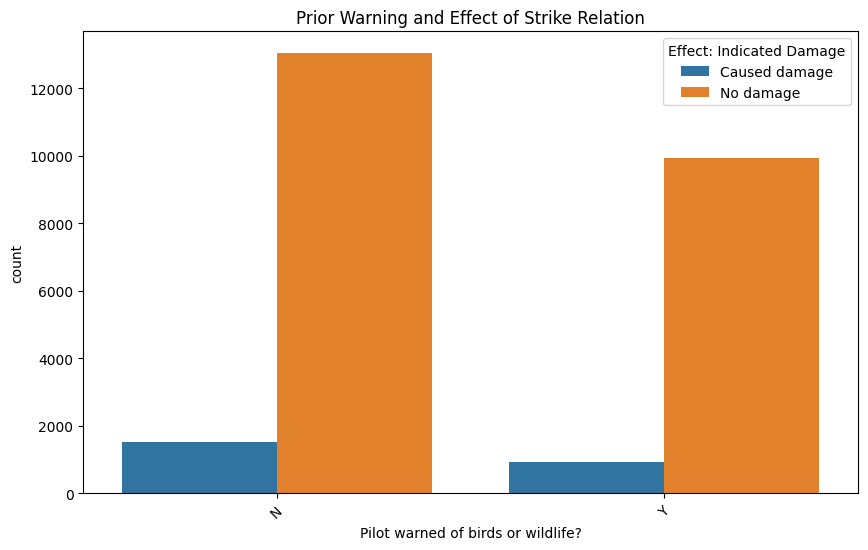

In [24]:
# Check column names
#print(bird_strikes_data.columns)

# If the column names are different, update them accordingly
# For example, if the correct column name is 'Effect: Indicated Damage'
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes_data, x='Pilot warned of birds or wildlife?', hue='Effect: Indicated Damage')
plt.title('Prior Warning and Effect of Strike Relation')
plt.xticks(rotation=45)
plt.show()


In [25]:
#bird_strikes_data.to_csv("updated.csv")